In [43]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from scipy import linalg

# 1) Do an SVD analysis of the images

In [80]:
#A matrix includes all images
A=[]
for (dirpath,dirs,files) in  os.walk('yalefaces_cropped\\CroppedYale'):
    for fn in files:
        img = cv.imread('yalefaces_cropped\\CroppedYale\\'+fn[:7]+'\\'+fn)[:,:,0] #just read first layer, since it's grayscale so all layers are the same
        A.append(img.flatten())
        
imgshape = img.shape #image size in pixels
A = np.array(A)
A=A.T #Transpose A so each image is a column instead of a row

testImg = A[:,-128] #Save 2nd to last face vector for testing later
A = A[:,:-128] #Cut off last 128 columns (last 2 faces in dataset) to use for testing later

avgFace= np.mean(A,axis=1) #Find the average face
avgFace = avgFace.reshape((len(avgFace),1)) #Reshape to col. vector
A = A - avgFace #subtract mean face from each face in A

U,S,Vt = np.linalg.svd(A,full_matrices=False) #Sing. Val. Decomp.
# plt.imshow(Aavg.reshape((ypix,xpix)),'gray')

# 2) What is the interpretation of the U, Σ and V matrices? (Plot the first few reshaped columns of U)

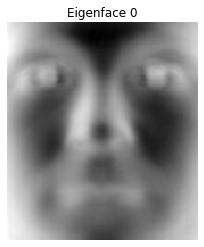

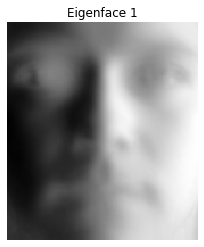

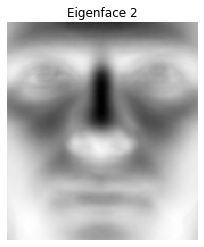

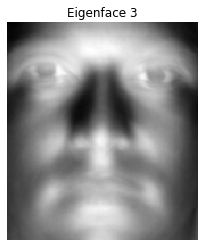

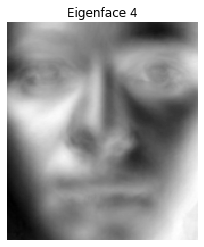

In [81]:
def imvecshow(imgvector,title): #reshape image vector into , then plot
    plt.imshow(imgvector.reshape(imgshape),'gray')
    plt.axis('off')
    plt.title(title)
    plt.show()

#plot the first few columns of U, reshaped into image form:
for i in range(5):
    imvecshow(U[:,i],'Eigenface '+str(i))
    
#ANSWER: 
# U columns are so-called 'eigenfaces.'

# 3)  What does the singular value spectrum look like and how many modes are necessary for good image reconstructions using the PCA basis? (i.e. what is the rank r of the face space?)


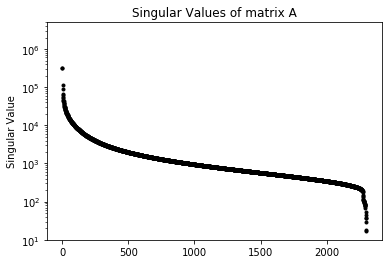

In [82]:
# S is a diagonal matrix of singular values, sorted greatest to least.
# Each singular value weights the importance of each eigenface (i.e. column in U)
plt.plot(range(len(S)),S,'k.')
plt.yscale('log')
plt.ylim(10,5*10**6)
plt.title('Singular Values of matrix A')
plt.ylabel('Singular Value')
plt.show()

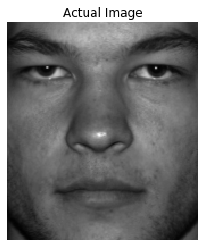

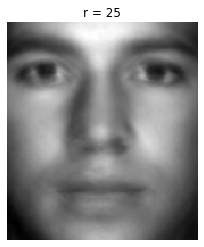

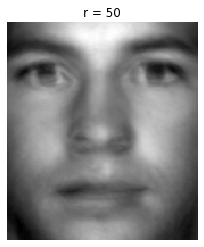

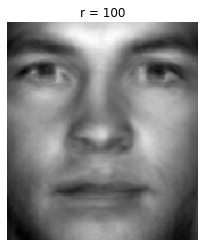

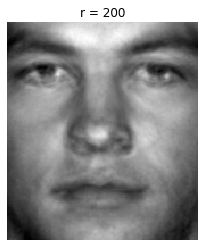

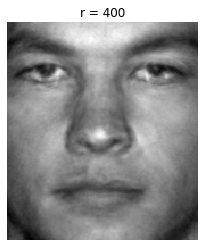

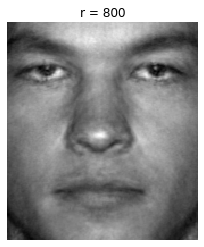

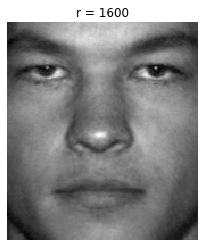

In [83]:
imvecshow(testImg,'Actual Image')

x=testImg.reshape(len(testImg),1) - avgFace
for r in [25,50,100,200,400,800,1600]: #number of cols of U (eigenfaces) used to reconstruct x
    Ur = U[:,:r] #First r cols of U (first r eigenfaces) 
    xtilda = avgFace + Ur @ (Ur.T @ x) 
    imvecshow(xtilda,'r = '+str(r))

#Answer: Looks pretty good after ~800 singular values!

# 4) Compare the difference between the cropped (and aligned) versus uncropped images in terms of singular value decay and reconstruction capabilities.


In [132]:
#Read non-cropped data into a matrix A2
A2 = []
for fn in os.listdir('yalefaces'):
    img = plt.imread('yalefaces\\'+fn)
    A2.append(img.flatten())
    
imgshape = img.shape
A2 = np.array(A2)
A2=A2.T #Transpose A so each image is a column instead of a row

testImg2 = A2[:,-11] #Save 2nd to last face vector for testing later
A2 = A2[:,:-11] #Cut off last 128 columns (last 2 faces in dataset) to use for testing later

avgFace2= np.mean(A2,axis=1) #Find the average face
avgFace2 = avgFace2.reshape((len(avgFace2),1)) #Reshape to col. vector
A2 = A2 - avgFace2 #subtract mean face from each face in A

U2,S2,Vt2 = np.linalg.svd(A2,full_matrices=False)

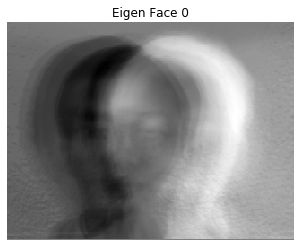

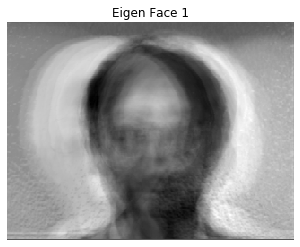

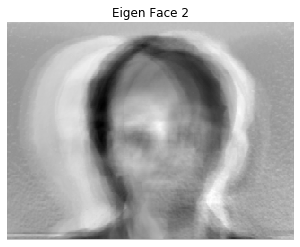

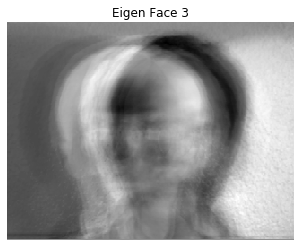

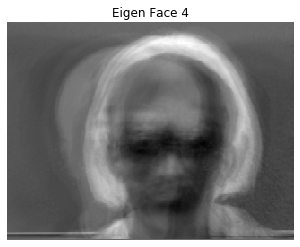

In [126]:
#Print eigenfaces
for i in range(5):
    imvecshow(U2[:,i],'Eigen Face '+str(i))

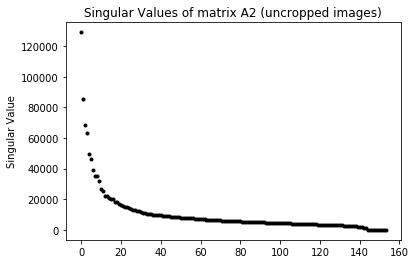

In [127]:
#Plot singular value spectrum
plt.plot(range(len(S2)),S2,'k.')
plt.title('Singular Values of matrix A2 (uncropped images)')
plt.ylabel('Singular Value')
plt.show()

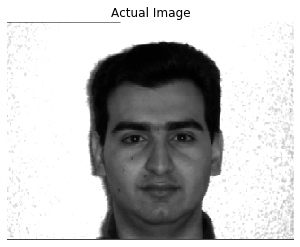

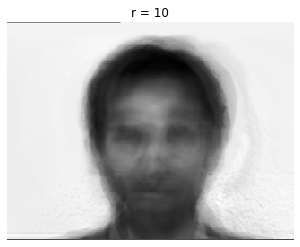

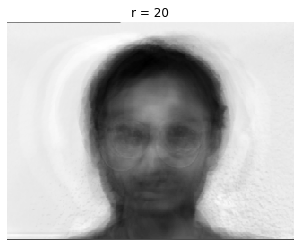

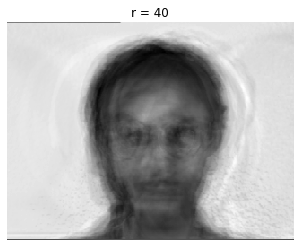

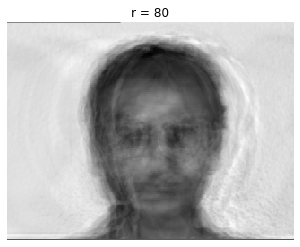

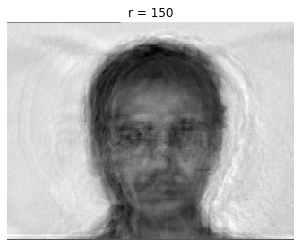

In [134]:
#Test reconstruction capabilities (not great!)
imvecshow(testImg2,'Actual Image')

x=testImg2.reshape(len(testImg2),1) - avgFace2
for r in [10,20,40,80,150]: #number of cols of U (eigenfaces) used to reconstruct x
    Ur2 = U2[:,:r] #First r cols of U (first r eigenfaces) 
    xtilda = avgFace2 + Ur2 @ (Ur2.T @ x) 
    imvecshow(xtilda,'r = '+str(r))